# Introduction to Probability Distributions
### Stephen Elston
### Data Science 350

This notebook introduces you to the basics of probility distributions. First, we will explore some discrete distributions, then we will examine continious distributions.

Jacob Bernoulli (1654, 1705) was an Swiss mathematician who pioneered many subects in mathematics, including the mathematical theory of probability. 

![](img/Bernoulli.jpg)

<center>**Jacob Bernoulli: Be happy he is not your statistics professor!**</center>

Bernoulli died before he could publish his book, *Ars conjectandi*, which set forth theories of probabilities. This included theory of probabilites from trails with discrete results. His incomplete book was eventually published postumously in 1713.

![](img/Ars.jpg)

## Descrete Distributions

Descrete distributions are used to model the probability of events with discrete outcomes or states. Descrete distributions have a countable number of possible outcomes. The distribution measures the probability of each of these outcoomes. We therefore call the distribution function the **Probability Mass Function**.

The basic properties of discrete distributions are:

- The sum of the probabilities of all possible events must equal 1.
- The probability of event is equal to the value of distribution at that point.
- All probabilities are strictly in the range 0-1.

### Bernoulli distributions

Bernoulli distributions model the outcomes of trials or experiements with binary outcomes. For example, the flip of a coin can only result in two possible end states, $\{ heads, tails \}$. 

For an event with a binary outcome, ${0,1}$ with probability $p$ of state 1, we can write the probability mass function for the Bernoulli distribution as:

$$
P(x\ |\ p) = \bigg\{ 
\begin{matrix}
p\ if\ x = 1\\
(p - 1)\ if\ x = 0
\end{matrix}\\
or\\
P(x\ |\ p) = p^x(1 - p)^{(1-x)}\ x \in {0, 1}
$$

Some other basic properties of the Bernoulli distribution are:

$$
Mean = p\\
Varience = p(1-p)
$$

Let's explore the Bernoulli distribution. The code in the cell below computes the outcome of $1000$ Bernoulli trials with $p = 0.75$. The theoretical and emperical mean and variance for these trials is then displayed. Execute this code and  examine the results. How close are the emperical mean and  variance to the theoretical?

In [1]:
# Bernoulli (Binomial with n = 1)
p = 0.75
n = 1000
bern_samples = rbinom(n, 1, p) # Compute random draws
bern_sample_mean = sum(bern_samples)/length(bern_samples)
print(paste('p =', as.character(p), '   Sample mean = ', as.character(bern_sample_mean)))
bern_sample_var = bern_sample_mean * (1-bern_sample_mean)
bern_var = p*(1-p)
print(paste('Brenoulli variance = ', as.character(bern_var), '   Sample varience = ', as.character(bern_sample_var)))

[1] "p = 0.75    Sample mean =  0.747"
[1] "Brenoulli variance =  0.1875    Sample varience =  0.188991"


**Your turn:** With $p = 0.75$ we expect that 75% of the trials with end with a value of 1. Verify this expectation by plotting a simple histogram of the variable `bern_samples` you just computed. Note that the code in the cell allows you to size the figure.

In [13]:
head(bern_samples, 15)

[1] 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1

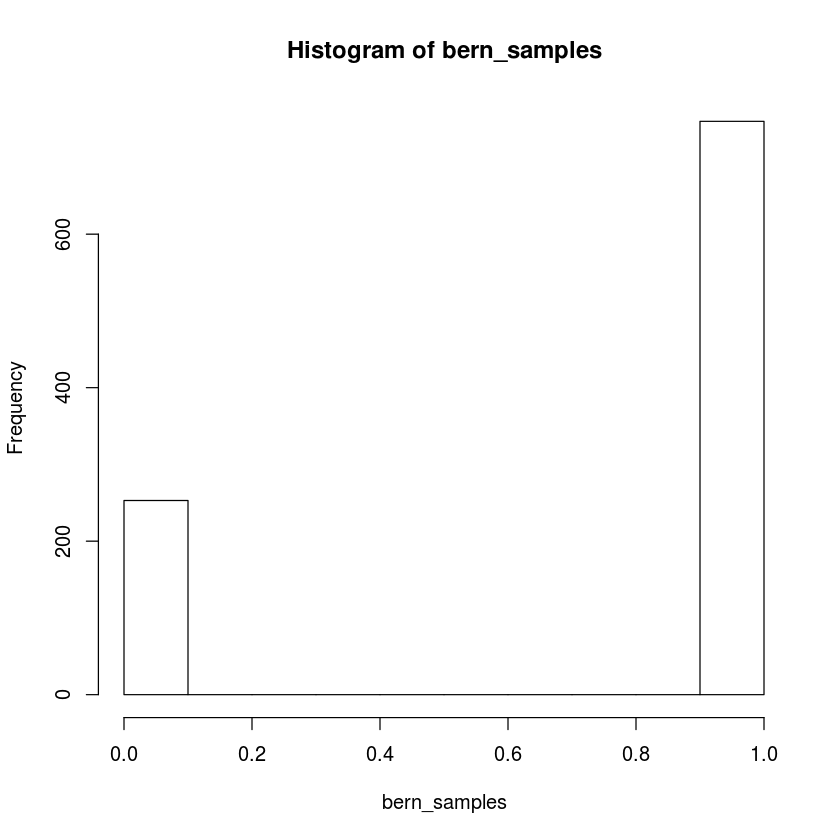

In [17]:
hist(bern_samples)

### Binomial distribution

We have just computed the outcome of a number of indepenent Bernoulli trials. The product of multiple Bernoulli trials is a Binomial distribution. For example, if we perform a number of Bernoulli trails ($\{success, fail \}$) on a sample (with replacement) of a population the number of successes will be a binomial distribution. 

The probability of $N$ Bernoulli trials with probability of positive outcome $p$ is writen as:

$$P(x\ |\ N, p) = \binom{N}{x} p^x(1 - p)^{(N-x)}$$

Notice that the product includes the term $\binom{N}{x}$ since we must account for all possible combinations of outcomes from the trials. 

Let's try computing a number several Binomial distributions, with probability of success $p = 0.75$, and $N = \{5, 25, 75 \}$. The code in the cell below computes $1000$ for realizations of the Binomial distribution for eacy value of $N$. The theoretical and sample means and variances are computed and printed for each case. Execute this code and examine the results. Are the sample means and variences close to the theoretical values?

In [ ]:
# Binomial
N = c(5, 25, 75) # parameter list
binom_samples = lapply(N, function(x) rbinom(n, x, p))  # Compute list of random draws

binom_sample_means = lapply(binom_samples, mean)  # Compute list of sample means
binom_means = N*p
data.frame(BinomialMean = binom_means, SampleMean = unlist(binom_sample_means))

binom_sample_vars = lapply(binom_samples, var) # Compute list of sample variance
binom_vars = N*p*(1-p)
data.frame(BinomialVariance = binom_vars, SampleVariance = unlist(binom_sample_vars))  

**Your turn:** In the cell below, create and execute the coded to plot the simple histograms of the three Binomial distributions in the `binom_samples` list. Do these distributions appear as you expect? **Hints:** a) Use `par(mfrow=c(3,1))` to create a plot with 3 stacked plots, making sure you set this back to 1 plot with `par(mfrow=c(3,1))`. b) Use `lappply` with `invisible` to interatite over the `binom_samples` list. c) Look at the code in the next code cell below. 

Notice that while the outcome of each Bernoulli trial is a discrete binary result, the product of multiple trails can tak many discrete values. In fact, as $N$ becomes large the Binomial distribution starts to look like a continious distribution. In fact, the Binomial distribution converges to the continious Normal distribution as $N \rightarrow \infty$. 

The code in the cell below computes the histogram of of the Binomial distribution and then the density of the equivelent Normal distribution. This done for the three sets of mean and variance previously computed with probability of success $p = 0.75$, and $N = \{5, 25, 75 \}$. Execute this code and examine the results. How does the Binomial distributon converge to the Normal distribution as $N$ increases?

In [ ]:
# Compare Normal Approximation to binomial
par(mfrow=c(3,1))
for (i in 1:3){
  hist(binom_samples[[i]], main=paste(N[i],'Experiments'), 
       freq=FALSE, xlim = c(0,70))
  x_norm = seq(0,N[i], by = 0.025)
  y_norm = dnorm(x_norm, mean=binom_means[i], sd=sqrt(binom_vars[i]))
  lines(x_norm, y_norm, xlim = c(0,70))
}
par(mfrow=c(1,1))

### Poisson distribution

A common problem is modeling of the count of events occuring within the some period of time. The Poisson distribution models the occurance of events in a fixed interval of time. We say that the Poisson distribution models the probability of x **arivals** within the time period. 

In mathematical terms we write the Poisson distribution as:

$$ 
P(x\ |\ \lambda) = \frac{\lambda^x}{x!} \exp^{-\lambda}
$$

The mean and variance of the Poisson distribution are both equal to $\lambda$, or:

$$
Mean = \lambda\\
Variance = \lambda
$$

The code in the cell below computes $1000$ realizations of Poisson distributions with average arrival rates, $\lambda = \{ 1, 5, 25, 100\}$. The sample mean and variance for each distribution is then computed and printed along with the theoretical values. Execute this code and examine the results. Do the theoretical values agree with the sample estimates? 

In [ ]:
# Poisson Distribution
lambda = c(1,5,25,100) # list of parmeters
poisson_samples = lapply(lambda, function(x) rpois(n, x))
poisson_sample_means = lapply(poisson_samples, mean) # Compute sample mean
poisson_sample_vars = lapply(poisson_samples, var) # Compute sample variance
data.frame(PoissonMean = lambda, SampleMean = unlist(poisson_sample_means), SampleVar = unlist(poisson_sample_vars))

As with the Binomial distribution, you can see that as $\lambda$ the discrete Poisson distribution approaches continious Normal distribution. The code in the cell below plots histograms of the Poisson distribution along with the density of the equivelent Normal distributions. Do the distributions converge toward the Normal as $\lambda$ increases? 

In [ ]:
#Normal approximation
par(mfrow=c(2,2))
for (i in 1:4){
  hist(poisson_samples[[i]], main=paste('Lambda=',lambda[i]), freq=FALSE)
  x_norm = seq(0,10*lambda[i], by = 0.025)
  y_norm = dnorm(x_norm, mean=lambda[i], sd=sqrt(lambda[i]))
  lines(x_norm, y_norm)
}
par(mfrow=c(1,1))

## Continuous Distributions

Continuous distributions are used to model variables with continious valued random variables. Physical measurements, such as weight, length and temperature, are examples of variables with continious variables. 

Continuous distributions have an infinite number of possible outcomes. The distribution measures the probability for some range of values. We therefore call the distribution function the **Probability Density Function**. This is in contrast to the probability mass function for discrete distributions. 

The probability of a value being in the range $\{X_1, X_2 \}$ can be writen as the integral of the probability density function over that range. 

$$P({X_1, X_2}) = \int_{X_1}^{X_2} P(x) dx $$

Notice that for a single exact value $X_1 = X_2$, and $P({X_1, X_2}) = 0.$

Properties of continious distributions are:

- The area under the distribution curve must be equal to 1, integrated over the range of possible values.
- The probability of a range of values of an event equals the **area** under density curve over that range of values.
- Probabilities cannot have negative values.
- The probability of any single, exact value, is 0.


### Uniform distribution

A Uniform distribution has flat probabity between limits $\{ a, b \}$ and $0$ outside that interval. The Uniform distribution is used in a number applications, including random selection of data and in simultion.

We can write the probability of the the Uniform distribution as:

$$
P(x\ | \{a,b \}) = \Bigg\{ 
\begin{matrix}
\frac{1}{(b - a)}\ if\ a \le x \le b\\
0\ if\ x \lt a\ or\ x\ \gt b
\end{matrix}
$$

The Uniform distribution has the following 

$$
Mean = \frac{(a + b)}{2}\\
Variance = \frac{1}{2}(b - a)^2
$$

The code in the cell below computes and plots the uniform distribution on the interval $\{ 0, 1 \}$, along with the kernel density plot. Execute this code and  examine the result. 

In [ ]:
# The Uniform Distribution
n = 1000
uniform_samples = runif(n)

options(repr.plot.width=5, repr.plot.height=4) ## Set the plot area.
plot(density(uniform_samples), main = 'Density of Uniform distribution') ## density plot
lines(c(0,0),c(0,1), col = 556)
lines(c(0,1),c(1,1), col = 556)
lines(c(1,1),c(0,1), col = 556)

Let's try simulating some Uniform distributions. The code in the cell below creates and plots the histogram Uniform distributions with $\{100, 1000, 10000, 100000\}$ realizations, along with the theoretical density. Execute this code and examine the results. Notice how close each histogram is to the theoretical density. 

In [ ]:
unif.hist = function(x, n) { 
  title = paste('Histogram of Uniform dist with', as.character(n), 'draws')
  breaks = seq(0, 1, length.out = 51)
  hist(x, breaks = breaks, main = title) 
  h = n/50
  lines(c(0,0),c(0,h), col = 'red')
  lines(c(0, 1),c(h, h), col = 'red')
  lines(c(1,1),c(0,h), col = 'red')
}

# Simulation with different n
n = c(100, 1000, 10000, 100000)
unifs = lapply(n, runif)

options(repr.plot.width=5, repr.plot.height=5) ## Set the plot area.
par(mfrow = c(2,2))
invisible(Map(unif.hist, unifs, n))
par(mfrow = c(1,1))


### Normal distribution

The Normal distribution is one of the most widely used probability distributions. Any case where values are the result of product of a large numbere of processes will converge to a Normal distribution. Many physical processes produce measurement values which are well modeled by a Normal distribution or Log-Normal distribution.

For a Normal distribution with we can write the density function as:

$$P(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp{\frac{-(x - \mu)^2}{2 \sigma^2}}$$

The parameters can be interpreted as:

$$
\mu = location\ parameter\ = mean\\
\sigma = scale = variance
$$

In other words, the location parameter sets the center of the distribution. The scale determines spread or width of the distribution.

The code in the cell below computes and plots the Normal distribution for four different combinations of location and scale, as shown in the table:

| $\mu$ | $\sigma$ |
|:-----:|:-------:|
| 0     | 1       |
| 5     | 1       |
| 0     | 0.1     |
| 4     | 4       |

Execute this code and examine the results. Notice how the center of the distribution changes with the scale and the width of the distribution changes with the scale.    

In [ ]:
# The Normal Distribution
# Try different parameters
n = 100000
n_params = list(c(0,1),c(5,1),c(0,0.1),c(4,4))
norm_samples = lapply(n_params,function(x) rnorm(n,mean=x[1], sd=sqrt(x[2])))

options(repr.plot.width=7, repr.plot.height=5) ## Set the plot area.
par(mfrow=c(1,1))
colors = c('black', 'red', 'blue', 'green')
plot(density(norm_samples[[1]]), xlim=c(-3,9),ylim=c(0,1.25),
     col=colors[1], lwd=2, xlab='x', ylab='y', main='Plot of Normals')
for (i in 2:4) lines(density(norm_samples[[i]]), col=colors[i], lwd=2)

grid()
legend('topright',c('N(0,1)','N(5,1)','N(0,0.1)','N(4,4)'),
       lwd=2,lty=1,col=colors)

We have now explored the basic properties of the Normal distribution. The relationship between the the quantiles and the number of $\sigma$s to the left or right of center is another important property of the Normal distribution. An understanding of this relationship provides some intuition about the likelihood of events under the Normal distribution.

The code in the cell below plots a histogram of 100000 realizations of a standard Normal distribution ($\mu = 0.0,\ \sigma = 1$). A table of quantiles and vertical lines are plotted a approximately $\sigma = \{-3, -2, -1,\ 0,\ 1,\ 2,\ 3\}$. Execute this code and examine the results. Notice that events become quite unlikely as $\sigma$ becomes large.

In [ ]:
norm.hist1 = function(x) { 
  xbar = as.character(round(mean(x), digits = 3))
  title = paste('Histogram of std Normal')
  breaks = seq(min(x), max(x), length.out = 61)
  hist(x, breaks = breaks, main = title) 
}

options(repr.plot.width=6, repr.plot.height=4) ## Set the plot area.
samp = rnorm(100000)
norm.hist1(samp)
qs = quantile(samp, probs = c(0.001, 0.023, 0.168, 0.5, 0.832, 0.977, .999))
qs
invisible(lapply(qs,function(x) abline(v = x, col = 'red')))              

The  

In [ ]:
# Try different numbers of random draws
n = c(100, 1000, 10000, 100000)
norms = lapply(n, function(x) rnorm(x))


norm.hist = function(x, n) { 
  xbar = as.character(round(mean(x), digits = 3))
  title = paste('Histogram of std Normal with', as.character(n), 
                'draws \n', 'sample mean =', xbar)
  breaks = seq(min(x), max(x), length.out = 61)
  hist(x, breaks = breaks, main = title) 
}

options(repr.plot.width=5, repr.plot.height=5) ## Set the plot area.    
par(mfrow = c(2,2))
invisible(Map(norm.hist, norms, n)) ## Map interates over multiple lists
par(mfrow = c(1,1))

### Log-Normal distribution

The Normal distribution is defined for continious random varibles in the range $-\infty \le x \le \infty$. However, many quantities one can measuree are only defined in a range $0 \lt x \le \infty$. Examples include, price, weight, length, and volume. 



In [ ]:
x = seq(0.01, 10, length=100000)
dln = dlnorm(x, meanlog = 0, sdlog = 1)
plot(x, dln, , type = 'l', lwd = 2, col = 'red',
     xlab = 'X', ylab = 'Density', main = 'Density of std Log-Normal') 

**Your turn:** The Log-Normal distribution is on log scale. You can transform the Log-Normal distribution to a Normal distribution. In the cell below create and excute the code to natural log transform the x variable and plot the density. How does this result compair to a standard Normal distribution.      

In [ ]:
plot(log(x), dln, , type = 'l', lwd = 2, col = 'red',
     xlab = 'X', ylab = 'Density', main = 'Density of std ln(Log-Normal)') 

### Student t-distribution

The Student t-distribution, often just referred to as the t-distribution. This distribuion is of importance in statistics since the error in the difference of the means of Normally distributed variables are t-distributed. 

The t-distribution is defined in a somewhat different way from the other distributions we have looked at. It has one parameter, the degrees of freedom, denoted as $\nu$. The derivation of the density function for the t-distribution is a bit complicated and leads to the following, rather complex result:

$$
P(x\ |\ \nu) = \frac{\Gamma(\frac{\nu + 1}{2})}{\sqrt{\nu \pi} \Gamma(\frac{\nu}{2})} \bigg(1 + \frac{x^2}{\nu} \bigg)^{- \frac{\nu + 1}{2}}\\
where\\
\Gamma(x) = Gamma\ function
$$

Dispite the complex density formula, you can gain a fair feel for the behavior of the t-distribution by plotting it for several values of $\nu$ and comparing it to the Normal distribution. The code in the cell below plots the density function for the t-distribution for degrees of freedom, $\nu = \{1, 2, 3, \infty \}$, along with a standard Normal distribution. Execute this code and examine the results. Notice how the t-distribution is wider with heavier tails than the Normal distribution. As $\nu \rightarrow \infty$ the t-distribution becomes identical to the Norma distribution. 

In [ ]:
options(repr.plot.width=7, repr.plot.height=5) ## Set the plot area.
x = seq(-4, 4, length=100)
dfs = c(1.0, 2.0, 5.0, Inf)
colors = c('red', 'blue', 'green', 'orange')
plot(x, dnorm(x), type = 'l', lwd = 4, lty = 1, col='black')
for (i in 1:4) lines(x, dt(x, dfs[i]), lwd = 2, lty = 2, col=colors[i])
legend('topright',c('df = 1','df = 2','df = 5', 'df = Inf', 'N(0,1)'),
       lwd=2,lty=1,col=colors)    

### Gamma and Exponential distributions

The Gamma disributions are a complex family of continious probability distributions. All distributions in the Gamma family are only defined for $0 \ge x \ge \infty$.

We will look at one special cases of particular interest, the exponential distribution. The Exponential distribution is used to model waiting times between events. We can write the formula for the probability density function of the Exponential distribution as:

$$P(x; \lambda) = \bigg\{ 
\begin{matrix}
\lambda \exp^{- \lambda x}\ if\ x \ge 0\\
0\ if\ x \lt 0
\end{matrix}\\
\\
where\\
Average\ arrival\ rate\ = Expected\ value\ = E[X] = \frac{1}{\lambda}\\
Var[X] = \frac{1}{\lambda^2}
$$

Notice also that:

$$average\ time\ between\ events = \lambda = \frac{1}{average\ arrival\ rate}$$

To get a feel for the Exponential distribution, let's plot it for arrival rates of $\{0.5, 1.0, 2.0  \}$ or $\lambda = \{ 2.0, 1.0, 0.5 \}$. Execute the code in the cell below to create the plot. Notice how the density function changes with $\lambda$.

In [ ]:
options(repr.plot.width=6, repr.plot.height=5) ## Set the plot area.
x = seq(0, 5, length=100)
lambda = c(0.5, 1.0, 2.0)
colors = c('red', 'blue', 'green')
plot(x, dexp(x, lambda[1]), type = 'l', lwd = 4, lty = 1, 
     col=colors[1], ylim = c(0, lambda[3]), 
    ylab = 'Density', xlab = 'X', main = 'Density of Exponential distribution')
for (i in 2:3) lines(x, dexp(x, lambda[i]), lwd = 2, lty = 2, col=colors[i])
legend('topright',c('0.5', '1.0', '2.0'),
       lwd=2,lty=1,col=colors)    

## Exponential Distributions

You may have noticed that several of the distributions we have discussed use exponential functions to compute the probabilities. We call this family of probability distributions the exponential family. 

## Summary

In this notebook you have explored the properties of certain descrete and continious probability distributions. We can summmarize the properties of this distributions as follows:

1. Discrete distributions
 - Descrete distributions are used to model the probability of events with discrete outcomes or states. 
 - We call the distribution function the **Probability Mass Function**.
 - The sum of the probabilities of all possible events must equal 1.
 - The probability of event is equal to the value of distribution at that point.
 - All probabilities are strictly in the range 0-1.
2. Continious distributions
 - Continious distributions have an infinite number of possible outcomes. The distribution measures the probability for some range of values. 
 - We call the distribution function the **Probability Density Function**. 
 - The probability of a range of values of an event equals the **area** under density curve over that range of values.
 - Probabilities cannot have negative values.
 - The probability of any single, exact value, is 0.

##### Copyright 2017, Stephen F. Elston. All rights reserved.